In [278]:
import gzip
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential,Input,Model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.advanced_activations import LeakyReLU
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc



In [279]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2
X = X / 255.

In [280]:
#išskaidžiau duomenis ir pridejau dim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.reshape(-1, 50,50, 1)
X_test = X_test.reshape(-1, 50, 50, 1)

  

In [281]:
#modelio kūrimas 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50, 50, 1),padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D((2, 2),padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_88 (LeakyReLU)  (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_89 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                

In [282]:
#modelio treniravimas
loss = model.fit(X_train, y_train, epochs =50, validation_split=0.2)

Epoch 1/50
225/225 [==============================] - 4s 17ms/step - loss: 1.6019 - accuracy: 0.3517 - val_loss: 1.3259 - val_accuracy: 0.4856
Epoch 2/50
225/225 [==============================] - 3s 15ms/step - loss: 1.2913 - accuracy: 0.4467 - val_loss: 1.2291 - val_accuracy: 0.4461
Epoch 3/50
225/225 [==============================] - 3s 15ms/step - loss: 1.2290 - accuracy: 0.4596 - val_loss: 1.1885 - val_accuracy: 0.5111
Epoch 4/50
225/225 [==============================] - 3s 15ms/step - loss: 1.1979 - accuracy: 0.4667 - val_loss: 1.1538 - val_accuracy: 0.5200
Epoch 5/50
225/225 [==============================] - 3s 14ms/step - loss: 1.1673 - accuracy: 0.4914 - val_loss: 1.1467 - val_accuracy: 0.4806
Epoch 6/50
225/225 [==============================] - 3s 14ms/step - loss: 1.1426 - accuracy: 0.5031 - val_loss: 1.1474 - val_accuracy: 0.5089
Epoch 7/50
225/225 [==============================] - 3s 13ms/step - loss: 1.1133 - accuracy: 0.5200 - val_loss: 1.0992 - val_accuracy: 0.5283

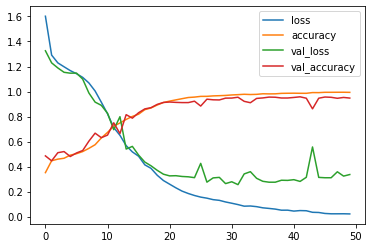

In [283]:
#grafinis modelio treniravimo razultatų atvaizdavimas
pd.DataFrame(loss.history).plot()


In [284]:
#testavimo rezultatai
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

32/32 - 0s - loss: 0.2694 - accuracy: 0.9560 - 199ms/epoch - 6ms/step
0.9559999704360962


In [285]:
model.save('model.h5')

In [286]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9793